In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:
# Loading the Sentiment140 dataset
sentiment_data = pd.read_csv('sentiment140.csv', encoding='ISO-8859-1', header=None)
sentiment_data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

In [6]:
# I was getting issues converting the date tp datetime so, I used .apply() to remove the timezone part for each row safely
sentiment_data['date'] = sentiment_data['date'].apply(lambda x: str(x).replace("PDT", "").strip())

# Convert to datetime after modification
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')

In [8]:
# Define categories based on keywords and remove 'Other'
categories_keywords = {
    'Health': ['exercise', 'fitness', 'health', 'workout', 'diet'],
    'Family': ['family', 'kids', 'home', 'parents'],
    'Food': ['food', 'recipe', 'cooking', 'eat'],
    'Tech': ['technology', 'tech', 'software', 'gadget'],
    'Beauty': ['beauty', 'skincare', 'makeup']
}

def categorize_post(text):
    for category, keywords in categories_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            return category
    return 'Other'


In [10]:
# Apply categorization and filter out 'Other'
sentiment_data['Category'] = sentiment_data['text'].apply(categorize_post)
filtered_data = sentiment_data[sentiment_data['Category'] != 'Other']

In [12]:
filtered_data = filtered_data.dropna(subset=['date', 'text'])
filtered_data = filtered_data.drop_duplicates()


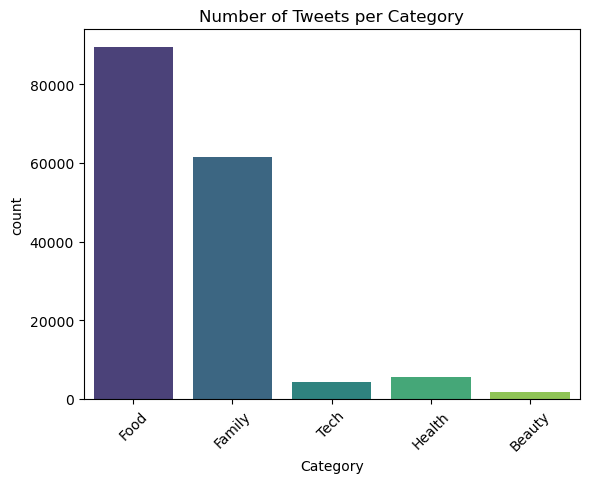

In [14]:
sns.countplot(data=filtered_data, x='Category', hue='Category', palette='viridis', legend=False)
plt.title('Number of Tweets per Category')
plt.xticks(rotation=45)
plt.show()

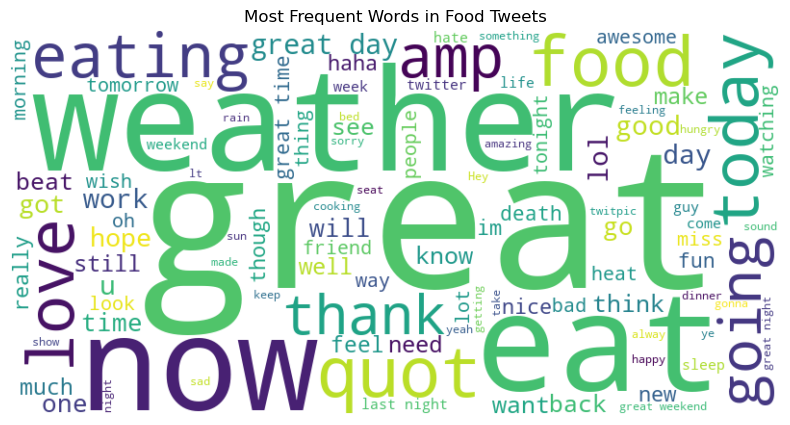

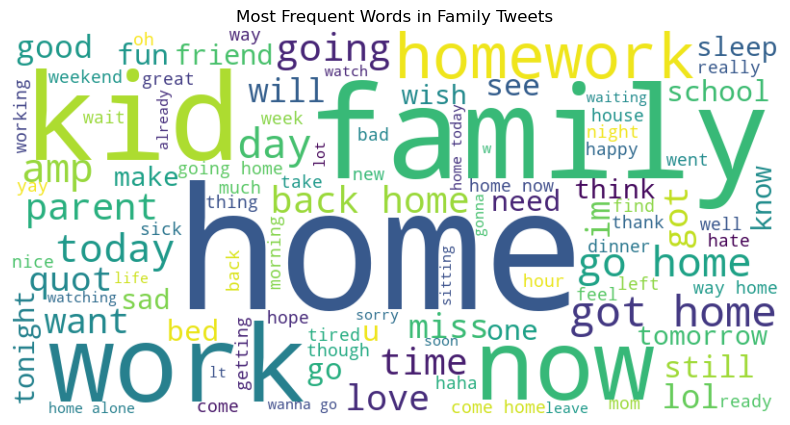

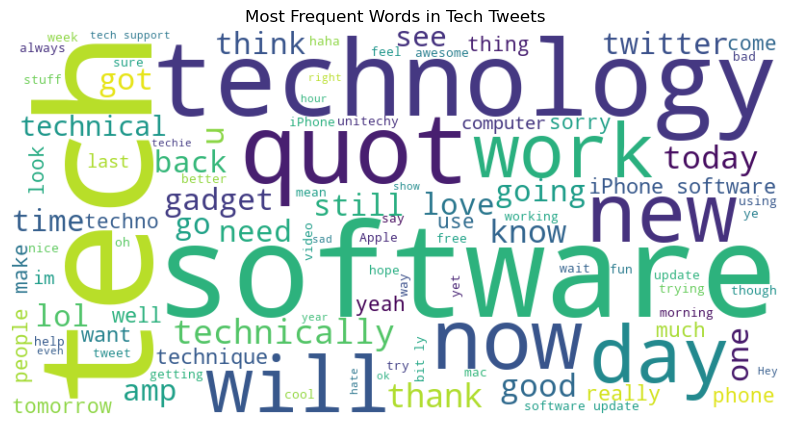

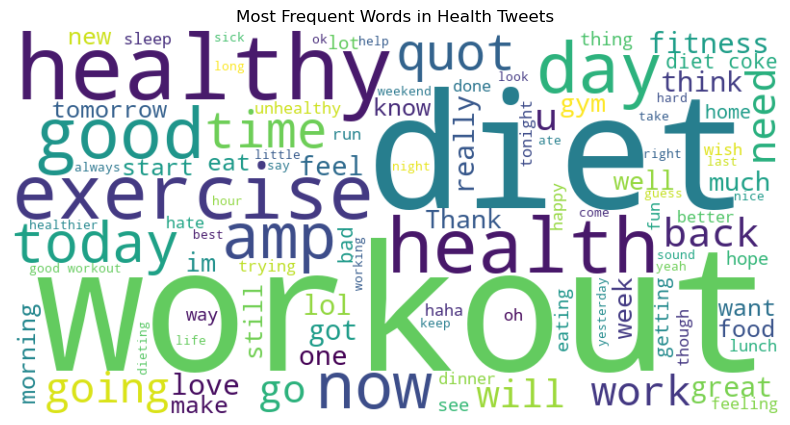

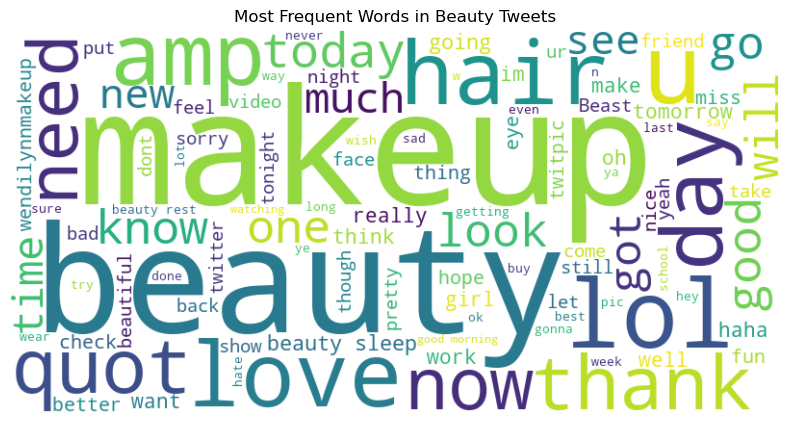

In [16]:
# 2. Most Frequent Words per Category (Word Cloud)
def plot_word_cloud(category):
    text = " ".join(tweet for tweet in filtered_data[filtered_data['Category'] == category]['text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Most Frequent Words in {category} Tweets")
    plt.show()

categories = filtered_data['Category'].unique()
for category in categories:
    plot_word_cloud(category)

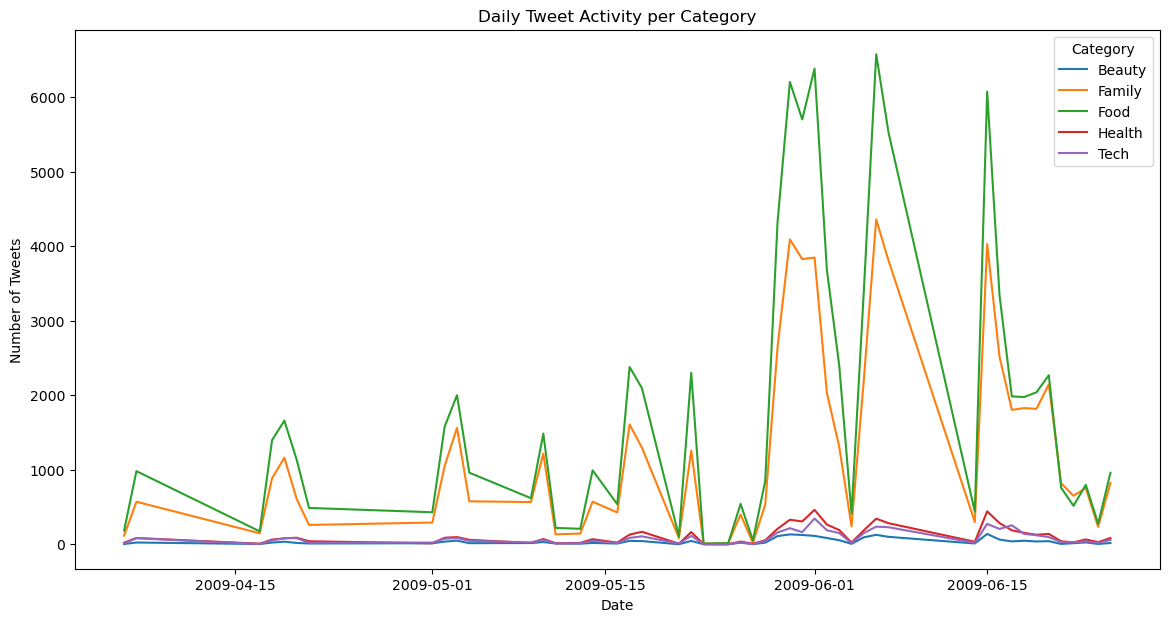

In [18]:
# 3. Tweets Over Time per Category
tweets_per_day = filtered_data.groupby([filtered_data['date'].dt.date, 'Category']).size().unstack(fill_value=0)
tweets_per_day.plot(figsize=(14, 7))
plt.title('Daily Tweet Activity per Category')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

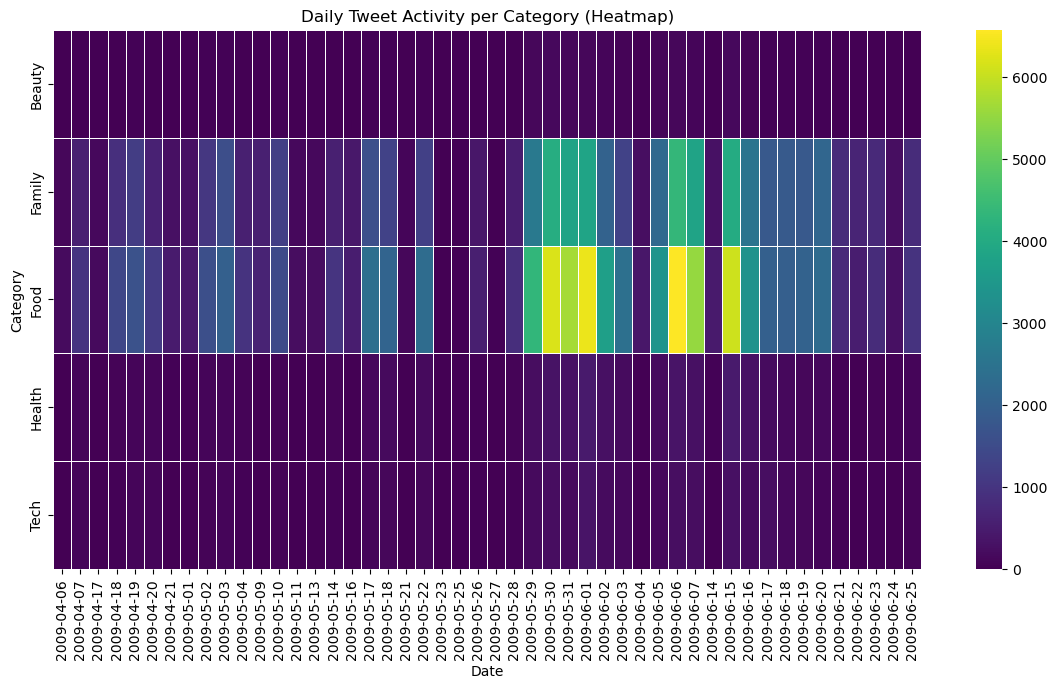

In [20]:
# 4. Daily Tweet Activity per Category (Heatmap)
filtered_data['hour'] = filtered_data['date'].dt.hour
tweet_activity = filtered_data.pivot_table(index=filtered_data['date'].dt.date, 
                                           columns='Category', 
                                           values='hour', 
                                           aggfunc='count', 
                                           fill_value=0)
plt.figure(figsize=(14, 7))
sns.heatmap(tweet_activity.T, cmap='viridis', linewidths=.5)
plt.title('Daily Tweet Activity per Category (Heatmap)')
plt.xlabel('Date')
plt.ylabel('Category')
plt.show()